# Health Insurance Cross Sell Prediction 🏠 🏥

Predict Health Insurance Owner's who wil be interested in Vehicle Insurance

# Workflow stages

The competition solution workflow goes through following stages:
1. Acquire training and testing data
2. Wrangle, prepare, and cleanse the data


In [1]:
import pandas as pd
import numpy as np
import sys
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Acquire Data
We will use Python Pandas package to load the data. We will store the data in train_df and test_df. We will combine the datato run certain operations on both datasets together.

In [2]:
train_df = pd.read_csv("D:\Learning\ML_projects\Health_Insurance_cross_sell_prediction/train.csv")
test_df = pd.read_csv("D:\Learning\ML_projects\Health_Insurance_cross_sell_prediction/test.csv")
combine = [train_df, test_df]

# Getting quick insights of data

We will try to get a quick insights of data. We will print the top five and bottom five rows of both the datasets. Also, we will print the names of all columns to check which features are available for us.

In [3]:
print(train_df.columns.values)

['id' 'Gender' 'Age' 'Driving_License' 'Region_Code' 'Previously_Insured'
 'Vehicle_Age' 'Vehicle_Damage' 'Annual_Premium' 'Policy_Sales_Channel'
 'Vintage' 'Response']


In [4]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
train_df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


## Which features are categorical (Nominal or Ordinal) and numerical (Continuous or Discrete) ?

* Nominal : **Gender, Driving_license, Previously_Insured, Vehicle_Damage, Response**

* Ordinal : **Vehicle_Age**

* Continuous : **Age, Annual_Premium.** 


In [6]:
test_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [7]:
test_df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265
127036,508146,Male,41,1,29.0,1,1-2 Year,No,27927.0,124.0,231


## Are there any blank, null or empty values?

So, there are no null values in dataset. We will move to next stage.

In [8]:
train_df.info()
print("="*100)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 

In [9]:
train_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


## Corelate the data.

We plot a heatmap and check the corelation. As Region code show' no relation we wil drop it. Also, we don't need id column so, we will drop it.

After that we will change the gender, vehicle age, and vehicle damage into categorical data.

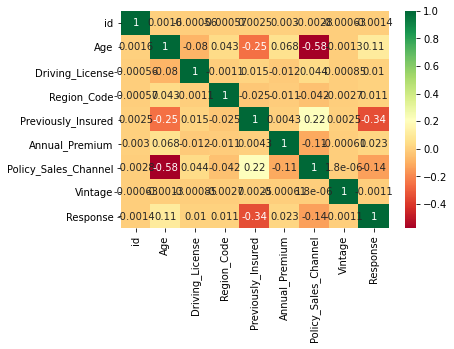

In [10]:
def health_in(data):
    correlation = data.corr()
    sns.heatmap(correlation, annot =True, cbar = True, cmap="RdYlGn")
    
health_in(train_df)

In [11]:
train_df = train_df.drop(['id'], axis=1)
test_df = test_df.drop(['id'], axis=1)

In [12]:
train_df = train_df.drop(['Region_Code'], axis=1)
test_df = test_df.drop(['Region_Code'], axis=1)

In [13]:
train_df.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,1,< 1 Year,No,27496.0,152.0,39,0


In [14]:
train_df.loc[train_df['Gender'] == 'Male', 'Gender'] = 0
train_df.loc[train_df['Gender'] == 'Female', 'Gender'] = 1
test_df.loc[test_df['Gender'] == 'Male', 'Gender'] = 0
test_df.loc[test_df['Gender'] == 'Female', 'Gender'] = 1

train_df.loc[train_df['Vehicle_Age'] == '< 1 Year', 'Vehicle_Age'] = 0
train_df.loc[train_df['Vehicle_Age'] == '1-2 Year', 'Vehicle_Age'] = 1
train_df.loc[train_df['Vehicle_Age'] == '> 2 Years', 'Vehicle_Age'] = 2
test_df.loc[test_df['Vehicle_Age'] == '< 1 Year', 'Vehicle_Age'] = 0
test_df.loc[test_df['Vehicle_Age'] == '1-2 Year', 'Vehicle_Age'] = 1
test_df.loc[test_df['Vehicle_Age'] == '> 2 Years', 'Vehicle_Age'] = 2


train_df.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,0,2,Yes,40454.0,26.0,217,1
1,0,76,1,0,1,No,33536.0,26.0,183,0
2,0,47,1,0,2,Yes,38294.0,26.0,27,1
3,0,21,1,1,0,No,28619.0,152.0,203,0
4,1,29,1,1,0,No,27496.0,152.0,39,0


In [15]:
train_df.loc[train_df['Vehicle_Damage'] == 'Yes', 'Vehicle_Damage'] = 1
train_df.loc[train_df['Vehicle_Damage'] == 'No', 'Vehicle_Damage'] = 0
test_df.loc[test_df['Vehicle_Damage'] == 'Yes', 'Vehicle_Damage'] = 1
test_df.loc[test_df['Vehicle_Damage'] == 'No', 'Vehicle_Damage'] = 0

test_df.head()


,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,25,1,1,0,0,35786.0,152.0,53
1,0,40,1,0,1,1,33762.0,7.0,111
2,0,47,1,0,1,1,40050.0,124.0,199
3,0,24,1,1,0,1,37356.0,152.0,187
4,0,27,1,1,0,0,59097.0,152.0,297


In [16]:
train_df.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,0,2,1,40454.0,26.0,217,1
1,0,76,1,0,1,0,33536.0,26.0,183,0
2,0,47,1,0,2,1,38294.0,26.0,27,1
3,0,21,1,1,0,0,28619.0,152.0,203,0
4,1,29,1,1,0,0,27496.0,152.0,39,0


In [18]:
X_train = train_df.drop(['Response'], axis =1)
Y_train = train_df['Response']

X_test = test_df
X_train.shape, Y_train.shape, X_test.shape

## Fitting and predictions

We will now fit the data using different classifiers. Firstly, we will import it and then we will predict and then store them.
If we see the result then we get the accuracy of 99.7 percent for both random forest and decision tree classifiers.


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [20]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

87.74

In [21]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

81.9

In [22]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn 


90.13

In [23]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Users\patil\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


87.74

In [24]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

21.44

In [25]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

99.7

In [26]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

99.7

In [27]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [ acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,99.70
6,Decision Tree,99.70
0,KNN,90.13
1,Logistic Regression,87.74
5,Linear SVC,87.74
3,Naive Bayes,81.90
4,Stochastic Gradient Decent,21.44


In [30]:
test_sf = pd.read_csv("D:\Learning\ML_projects\Health_Insurance_cross_sell_prediction/test.csv")


In [32]:
submission = pd.DataFrame({
        "Id": test_sf["id"],
        "Response": Y_pred
    })
submission.to_csv('D:\Learning\ML_projects\Health_Insurance_cross_sell_prediction/submission.csv', index=False)